In [9]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%matplotlib inline

In [10]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitectureClass.ipynb'
%run 'batchGeneratorClass.ipynb'

In [11]:
#Compiling model with branching on the level of Convolution block #5
model = compileModel((1,64,64,64),regRate=1e-3,dropRate=0.3)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), padding="same", data_format="channels_first", kernel_regularizer=<keras.reg...)`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras

Compiling model...


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_regularizer=<keras.reg..., name="Nodule", activation="softmax")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("No..., inputs=Tensor("in...)`


In [12]:
# model.load_weights('/home/katya/LungCancer/Katya/CNN_v1/model_v1_weights_temp64.h5')

nbEpochs = 10

modelPath = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_class.h5'

validInd = {}

model, lossHist, validInd['true'], validInd['random'] = trainModelClass(model, 
                                                            modelPath, 
                                                            batchSize=30, 
                                                            nbEpoch=nbEpochs, 
                                                            stepsPerEpoch=50)

model.save_weights('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_weights_class.h5')

Loading positive patches
Loading negative patches


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=0, epochs=1, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


Epoch 1/1
50/50 [==============================] - 113s - loss: 0.7561 - categorical_accuracy: 0.6636 - val_loss: 9.4522 - val_categorical_accuracy: 0.3136

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=1, epochs=2, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.6503 - categorical_accuracy: 0.6909 - val_loss: 0.8341 - val_categorical_accuracy: 0.4273

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=2, epochs=3, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.6363 - categorical_accuracy: 0.6991 - val_loss: 0.6131 - val_categorical_accuracy: 0.7364

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=3, epochs=4, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.6124 - categorical_accuracy: 0.7236 - val_loss: 0.5977 - val_categorical_accuracy: 0.7136

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=4, epochs=5, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.5915 - categorical_accuracy: 0.7345 - val_loss: 0.6024 - val_categorical_accuracy: 0.7091

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=5, epochs=6, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.6042 - categorical_accuracy: 0.7245 - val_loss: 0.6085 - val_categorical_accuracy: 0.7409

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=6, epochs=7, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.5980 - categorical_accuracy: 0.7282 - val_loss: 0.6453 - val_categorical_accuracy: 0.7273

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=7, epochs=8, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.5701 - categorical_accuracy: 0.7391 - val_loss: 0.6815 - val_categorical_accuracy: 0.6818

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=8, epochs=9, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.5792 - categorical_accuracy: 0.7355 - val_loss: 0.6842 - val_categorical_accuracy: 0.6545

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=9, epochs=10, validation_steps=10, steps_per_epoch=50, validation_data=<generator..., callbacks=[<keras.ca...)`


50/50 [==============================] - 113s - loss: 0.6043 - categorical_accuracy: 0.7236 - val_loss: 0.6513 - val_categorical_accuracy: 0.6955

OSError: Unable to create file (Unable to open file: name = '/home/katya/lungcancer/katya/                                cnn_v3_nodule_classification/model_and_weights/luna_model_v3_weights_class.h5', errno = 2, error message = 'no such file or directory', flags = 13, o_flags = 242)

In [14]:
for key in validInd:
    np.save('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/valid_inds_'+key+'.npy', validInd[key])

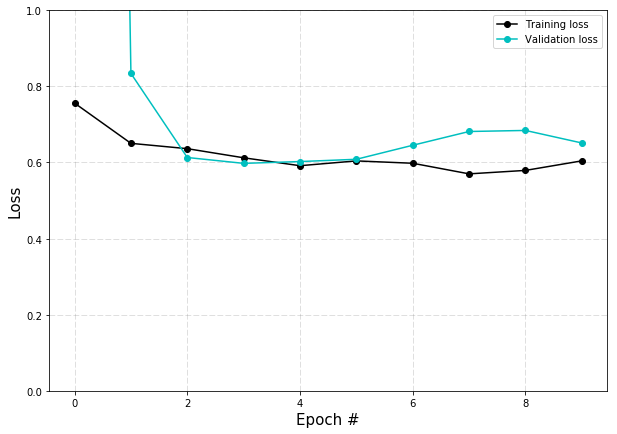

In [18]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.plot([x for x in range(nbEpochs)], lossHist['loss'], 'o-k', label='Training loss')
plt.plot([x for x in range(nbEpochs)], lossHist['val_loss'], 'o-c', label='Validation loss')
plt.legend()
plt.ylim([0,1])
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/' + str(version) + '.png')

In [16]:
version = 1.5